<a href="https://colab.research.google.com/github/ManshaP/CCEES/blob/master/exercise_2/Bifurcation_diagram_of_logistic_map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 2

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## 1. Second Iterate

Logistic map:
\begin{align*}
f(u_i)=u_{i+1} = \mu\ u_i\ (1-u_i)
\end{align*}

Second iterate of te logistic map:
\begin{align*}
f^2(u)  =f \left( f\left(u\right) \right) = \mu^2 \ u \ (1-u)\ \left[ 1-\mu\ u \ (1-u) \right]
\end{align*}

New map:
\begin{align*}
u_{i+1}  = f^2(u_i)
\end{align*}

### a)

### b)

In [2]:
# define logistic map

def logistic_map(u, mu):
    return mu * u * (1 - u)

# define generic nth iterate map

def n_iterate_map(n, u, mu):
    current_u = u
    for i in range(n):
        current_u = logistic_map(current_u, mu)
    return current_u

def logistic_iterates(u, mus, n=2):
    sim = {}
    for mu in mus:
        iterates = []
        for i in range(n+1):
            nth_iterate = n_iterate_map(i, u, mu)
            iterates.append(nth_iterate)
        sim[mu] = iterates
    return sim

In [3]:
# calculate with given parameters

mus = [-1, 0, 1, 2, 3, 4, 5]
u_range = np.linspace(0, 2, 200)

sim = logistic_iterates(u_range, mus, 4)

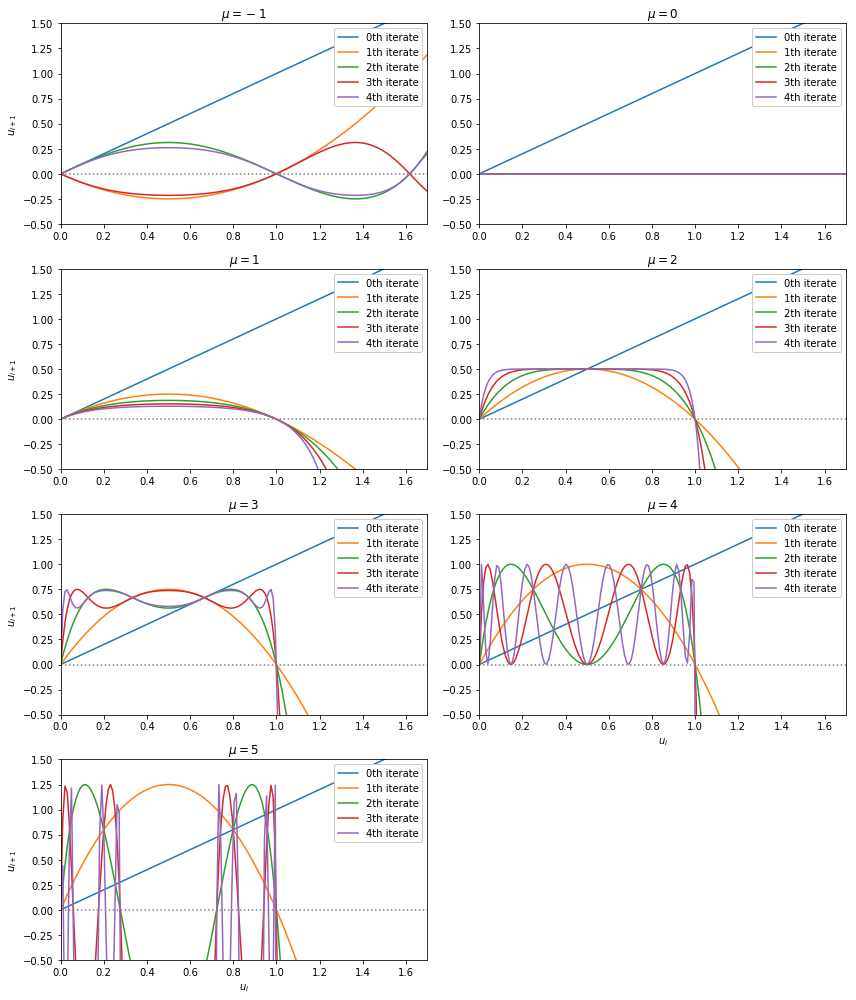

In [4]:
# plot results

n_mu = len(sim)

fig = plt.figure()

axs = []
for i in range(n_mu):
    row = i//2
    col = int(i%2)
    axs.append(plt.subplot2grid((n_mu//2+1, 2), (row, col)))

for i, mu in enumerate(sim.keys()):
    for n, f in enumerate(sim[mu]):
        axs[i].plot(u_range, f, label='{}th iterate'.format(n))
    axs[i].plot(u_range, np.zeros(len(u_range)), color='.5', linestyle=':')
    
    axs[i].legend(framealpha=1, loc=1)
    if i%2 == 0:
        axs[i].set_ylabel(r'$u_{i+1}$')
    axs[i].set_title(r'$\mu = {}$'.format(mu))
    
    axs[i].set_xlim(0., 1.7)
    axs[i].set_ylim(-.5, 1.5)

axs[-1].set_xlabel(r'$u_i$')
if n_mu > 1:
    axs[-2].set_xlabel(r'$u_i$')

fig.set_size_inches(12, n_mu*2)
fig.tight_layout()
plt.show()

In [43]:
u0=0.5
mu0=3.5
spin_up=4000
plot_steps=400
def single_mu_it(n, u, mu):
  iterates = []
  for i in range(n+1):
    nth_iterate = n_iterate_map(i, u0, mu)
    iterates.append(nth_iterate)
  return iterates
    

In [67]:
a=single_mu_it(spin_up+plot_steps, u0, mu0 )

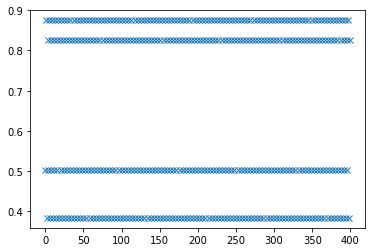

In [45]:
plt.plot(a[spin_up:(spin_up+plot_steps)], marker='x', linestyle='None')

In [57]:

def stepper(u0, mu0, mu1, N_mu):
    bif_data=[]
    for i in range(N_mu):
        current_mu=mu0+(mu1-mu0)*i/N_mu
        bif_data.append(single_mu_it(spin_up+plot_steps, u0, current_mu)[spin_up:(spin_up+plot_steps)])
    return np.array(bif_data)

In [ ]:
u0=0.5
mu0=2.8
mu1=4.5
N_mu=1000
bif_data=stepper(u0, mu0, mu1, N_mu)
mu_range=np.repeat(np.linspace(mu0, mu1, N_mu), plot_steps)
plt.scatter(mu_range, bif_data, marker='x')

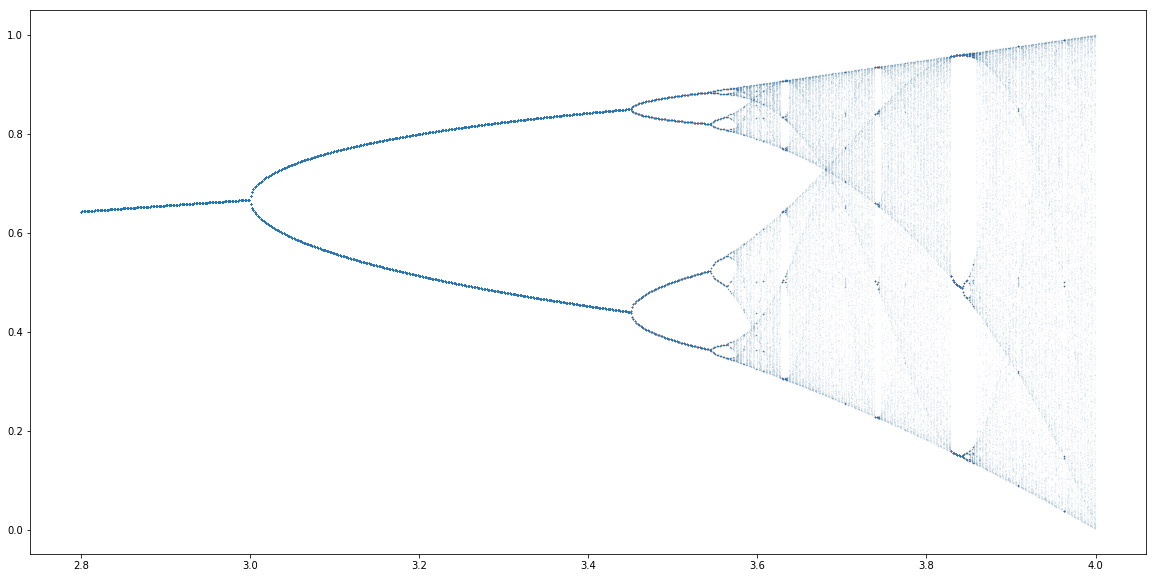

In [68]:
plt.figure(figsize=(20,10))
plt.scatter(mu_range, bif_data, marker='.', s=0.001)